In [124]:
import numpy as np
from scipy.signal import periodogram
from scipy.stats import norm
from matplotlib import pyplot as plt

In [125]:
# Data to be transmitted
msg = np.random.randint(low=0, high=2, size=int(1e6))
# BPSK parameters
Eb = 0.001
fc = 100
fs = 10000
Tb = 0.001

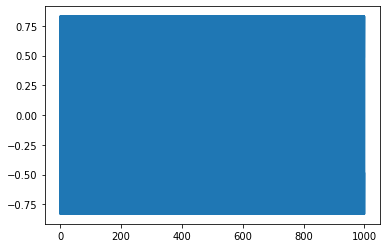

In [126]:
# PSK Transmitter
signal = []
t = np.linspace(0, Tb, Tb*fs)
for i in msg:
    s = np.sqrt(2*Eb/Tb)*np.sin(2*np.pi*fc*t)
    if i == 0:
        s = -s
    signal.extend(s)
t = np.linspace(0, len(msg)*Tb, len(msg)*Tb*fs)

fig, ax = plt.subplots()
ax.plot(t, signal)

0.00040013421685264165


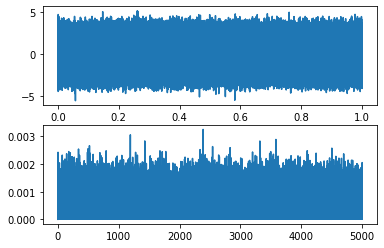

In [127]:
# Noise
ns = len(signal)
noise = np.random.normal(size=ns)

f, psd = periodogram(noise, fs)

fig, ax = plt.subplots(2,1)
ax[0].plot(noise)
ax[1].plot(f, psd)

psd_av = np.mean(psd)
N0 = 2*psd_av
signal += noise
print(N0)

In [128]:
# PSK Coherent Binary Receiver
t = np.linspace(0, Tb, Tb*fs)
phi = np.sqrt(2/Tb)*np.sin(2*np.pi*fc*t)
N = len(signal) // len(t)
# print(N)
signal = np.array_split(signal, N)
# print(len(signal))
received_msg = []
for i in signal:
    x = i*phi
    sm = x.sum()/fs
    if sm > 0:
        received_msg.append(1)
    else:
        received_msg.append(0)


In [129]:
# Bit Error Probability Calculations
Pb = norm.sf(np.sqrt(2*Eb/N0))
print('Theoretical Bit Error Probability:', Pb)
Pb_pr = np.count_nonzero(msg != received_msg) / len(msg)
print('Practical Bit Error Probability:', Pb_pr)

Theoretical Bit Error Probability: 0.012685946420894375
Practical Bit Error Probability: 0.055459
